<a href="https://colab.research.google.com/github/tim-fihost/DB_Time/blob/main/db_time_series_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3 as sl
con = sl.connect('my-test.db')


In [ ]:
with con:
    con.execute("""
        CREATE TABLE USER (
            id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
            name TEXT,
            age INTEGER
        );
    """)

In [ ]:
sql = 'INSERT INTO USER (id, name, age) values(?, ?, ?)'
data = [
    (1, 'Alice', 21),
    (2, 'Bob', 22),
    (3, 'Chris', 23)
]

In [ ]:
with con:
    con.executemany(sql, data)

In [ ]:
with con:
    data = con.execute("SELECT * FROM USER WHERE age <= 22")
    for row in data:
        print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


In [ ]:
import pandas as pd

df_skill = pd.DataFrame({
    'user_id': [1,1,2,2,3,3,3],
    'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [ ]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
    SELECT s.user_id, u.name, u.age, s.skill 
    FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
''', con)

df


,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [ ]:
df.to_sql('USER_SKILL', con)

In [ ]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [ ]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [ ]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-17


In [ ]:
%sql SELECT date('now','start of month','+1 month','-1 day');

 * sqlite:///demo.db3
Done.


"date('now','start of month','+1 month','-1 day')"
2022-11-30


In [ ]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [ ]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

In [ ]:
def dt(days):
    return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
    timestamp = now - dt(days=(N_rows - i))
    temperature = uniform(18, 26)
    %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

In [ ]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-07-05 07:41:14,23.79592302952906
2021-07-06 07:41:14,22.870056763358185
2021-07-07 07:41:14,18.492840229204873
2021-07-08 07:41:14,25.17232293511931
2021-07-09 07:41:14,18.840830324302704


In [ ]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-07-05 07:41:14.714379,23.79592302952906
2021-07-06 07:41:14.714379,22.870056763358185
2021-07-07 07:41:14.714379,18.492840229204873
2021-07-08 07:41:14.714379,25.17232293511931
2021-07-09 07:41:14.714379,18.840830324302704
2021-07-10 07:41:14.714379,18.732412629134537
2021-07-11 07:41:14.714379,20.632227500509877
2021-07-12 07:41:14.714379,24.204575982509148
2021-07-13 07:41:14.714379,25.584981780214466
2021-07-14 07:41:14.714379,24.681592972780827


In [ ]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature 
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-07-05 07:41:14.714379,23.79592302952906
2021-07-06 07:41:14.714379,22.870056763358185
2021-07-07 07:41:14.714379,18.492840229204873
2021-07-08 07:41:14.714379,25.17232293511931
2021-07-09 07:41:14.714379,18.840830324302704
2021-07-10 07:41:14.714379,18.732412629134537
2021-07-11 07:41:14.714379,20.632227500509877
2021-07-12 07:41:14.714379,24.204575982509148
2021-07-13 07:41:14.714379,25.584981780214466
2021-07-14 07:41:14.714379,24.681592972780827


In [ ]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year, 
       AVG(Temperature) AS MEAN_TMP,
       MAX(Temperature) AS MAX_TMP,
       MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,22.212159011797024,25.88014163500437,18.05394253471946
2022,22.125438927775708,25.9688987291108,18.011439376747074


In [ ]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True) 
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-07-05 07:41:14', '2021-07-06 07:41:14',
               '2021-07-07 07:41:14', '2021-07-08 07:41:14',
               '2021-07-09 07:41:14', '2021-07-10 07:41:14',
               '2021-07-11 07:41:14', '2021-07-12 07:41:14',
               '2021-07-13 07:41:14', '2021-07-14 07:41:14',
               ...
               '2022-11-07 07:41:14', '2022-11-08 07:41:14',
               '2022-11-09 07:41:14', '2022-11-10 07:41:14',
               '2022-11-11 07:41:14', '2022-11-12 07:41:14',
               '2022-11-13 07:41:14', '2022-11-14 07:41:14',
               '2022-11-15 07:41:14', '2022-11-16 07:41:14'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

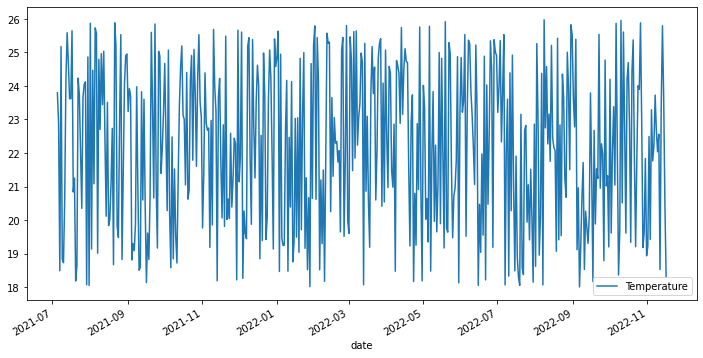

In [ ]:
df.plot(figsize=(12, 6))